In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

sns.set_style("whitegrid")

df = pd.read_csv("../data/orig_train.csv")

# Basic Data Exploration

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [166]:
SHOW_ROWS = 4
columns = ["dtype", "missing"] + [f"example_row_{i + 1}" for i in range(SHOW_ROWS)]

pd.DataFrame(np.c_[df.dtypes, pd.isna(df).sum(), df.head(SHOW_ROWS).T], index=df.columns, columns=columns)

,dtype,missing,example_row_1,example_row_2,example_row_3,example_row_4
PRODUCT,object,0,C,C,F,C
AGE,int64,0,65,64,30,39
AREA,object,0,County capital,County capital,Urban area,County capital
RESIDENTIAL_PLACE,object,0,Owner without mortgage,Owner without mortgage,Living with family,Owner without mortgage
EDUCATION,object,0,University,University,University,Post-graduate
MARITAL_STATUS,object,0,married,married,married,divorced
HOUSEHOLD_MEMBERS,int64,0,2,2,2,1
NO_OF_DEPENDENTS,int64,0,0,0,0,0
INCOME,float64,0,1245.0,1380.0,1131.0,1730.0
WORK_SENIORITY,int64,0,5,5,2,9


In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


We can see that the format of BUSINESS AGE doesn't match the rest of the names. Let's change it.

In [168]:
df = df.rename(columns={'BUSINESS AGE':'BUSINESS_AGE'})


In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS_AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


In [170]:
df.describe(include="object").T

,count,unique,top,freq
PRODUCT,15097,6,C,6779
AREA,15097,4,County capital,7586
RESIDENTIAL_PLACE,15097,5,Owner without mortgage,8457
EDUCATION,15097,10,University,5457
MARITAL_STATUS,15097,4,married,8141
ECONOMIC_SECTOR,15097,18,Missing,4009
EMPLOYEE_NO,15097,9,Missing,3338


From below list we can clearly say that **Missing** is a key word to indicate missing values in a dataset for categorical variables.

In [171]:
CATEGORICAL = list(df.select_dtypes(include="object").columns)

def print_categorical_distribution(cols):
    print(f"{'COLUMN NAME':20s}{'CAT NUM':10s}CATEGORIES")
    for col in cols:
        print(f"{col:20s}{len(df[col].unique()):<10}{', '.join([f'{name}({count})' for name, count in df[col].value_counts().items()])}")
        
print_categorical_distribution(CATEGORICAL)

COLUMN NAME         CAT NUM   CATEGORIES
PRODUCT             6         C(6779), B(3407), F(3334), E(1522), A(42), D(13)
AREA                4         County capital(7586), Rural area(4192), Urban area(3286), Missing(33)
RESIDENTIAL_PLACE   5         Owner without mortgage(8457), Living with family(5505), Owner with mortgage(861), Other(246), Rental(28)
EDUCATION           10        University(5457), Highschool(3451), Post secondary school(1620), Vocational school(1228), Post-graduate(1046), Other(819), Missing(691), College(562), Middle school(195), Primary school(28)
MARITAL_STATUS      4         married(8141), single(5113), divorced(1045), widow(798)
ECONOMIC_SECTOR     18        Missing(4009), Manufacturing(3093), Wholesale and retail trade(1413), Public administration and defence(1257), Other(840), Transportation and storage(691), Human health and social work activities(668), Information and communication(517), Education(460), Professional, scientific and technical activities(393),

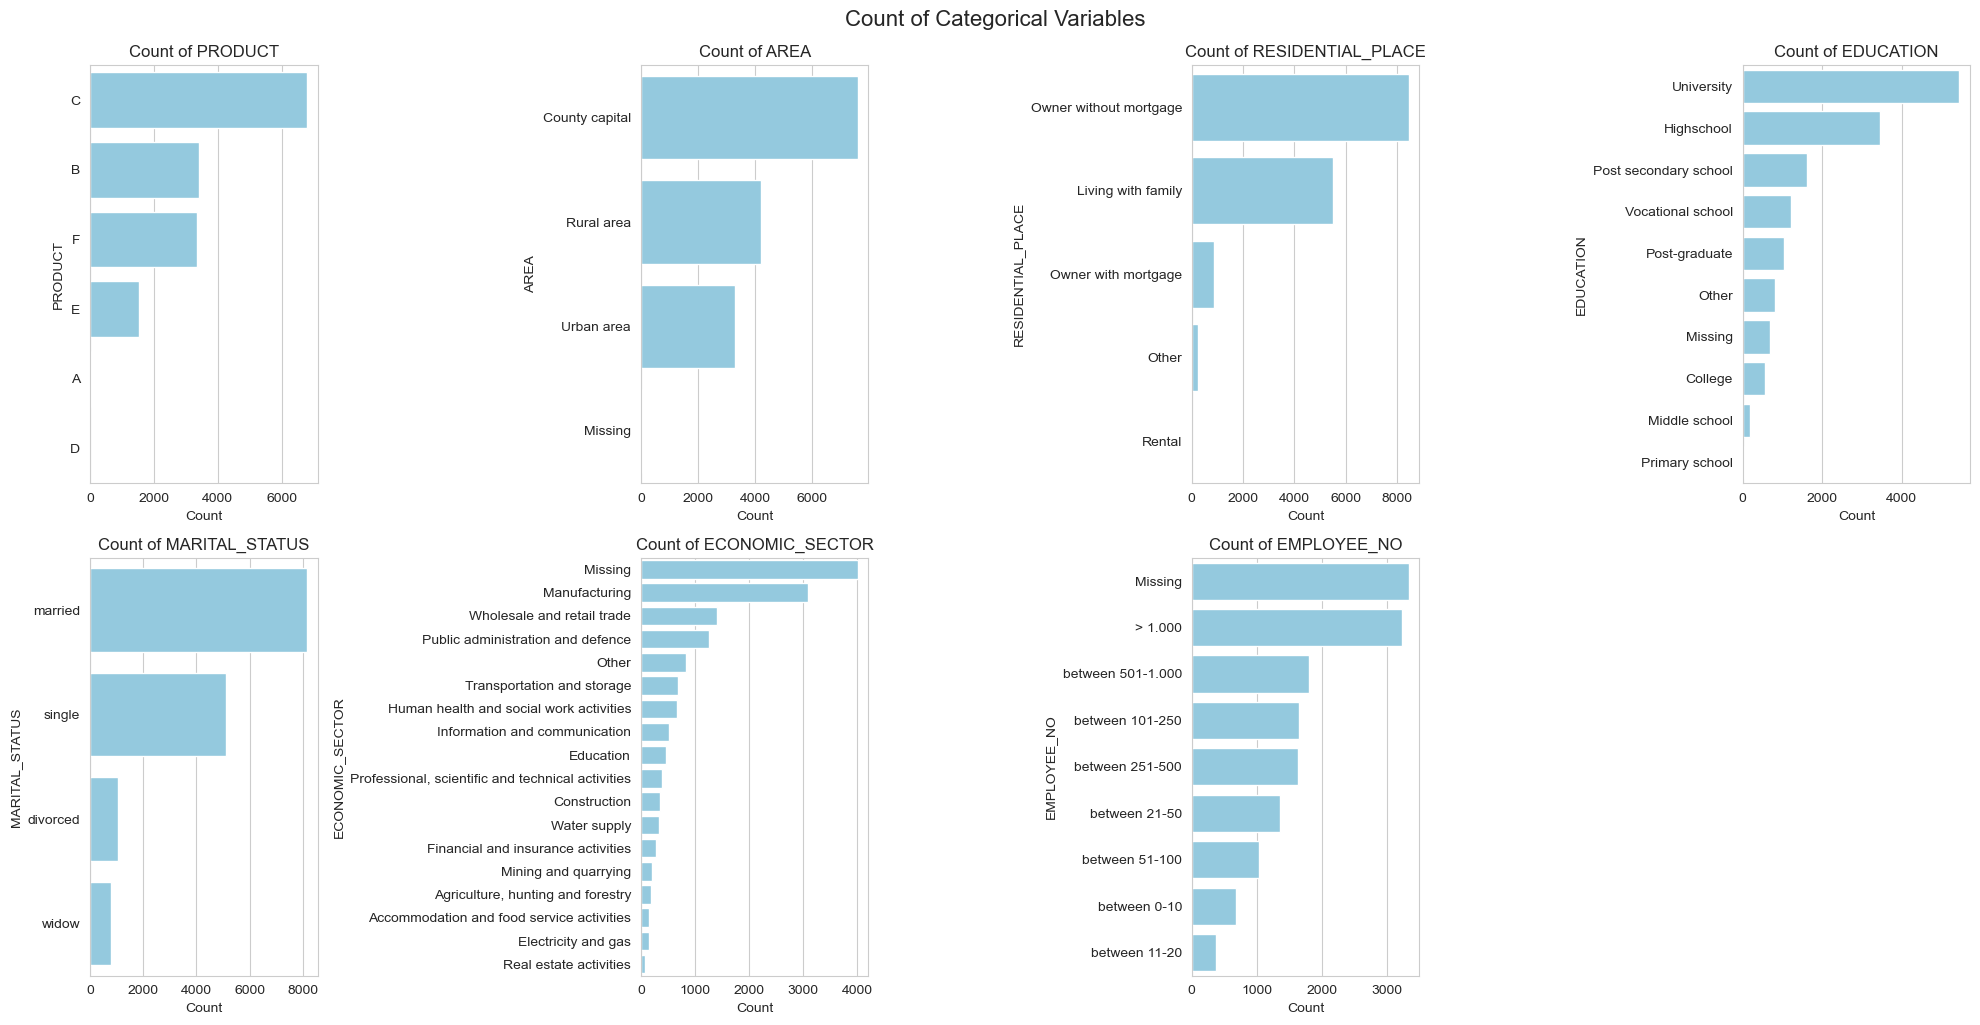

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(CATEGORICAL):
    if i < len(CATEGORICAL):
        sns.countplot(data=df, y=col, color="skyblue", ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f"Count of {col}")
        axes[i].set_xlabel("Count")
        axes[i].set_ylabel(col)

    else:
        
        fig.delaxes(axes[i])
plt.tight_layout()
plt.suptitle("Count of Categorical Variables", fontsize=16, y=1.02)
axes[-1].axis('off')
plt.show()

In [173]:
print(f"{'COLUMN NAME':20s}{'MISSING NUM':15s}MISSING %")
MISSING_CATEGORICAL = []
for col in CATEGORICAL:
    missing = np.sum(df[col] == 'Missing')
    print(f"{col:20s}{missing:<15}{missing/len(df):.2f}")
    
    if missing > 0:
        MISSING_CATEGORICAL.append(col)

COLUMN NAME         MISSING NUM    MISSING %
PRODUCT             0              0.00
AREA                33             0.00
RESIDENTIAL_PLACE   0              0.00
EDUCATION           691            0.05
MARITAL_STATUS      0              0.00
ECONOMIC_SECTOR     4009           0.27
EMPLOYEE_NO         3338           0.22


# Understanding Data Distribution

C:\Users\micha\AppData\Local\Temp\ipykernel_27012\3208842076.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col_name], color='red', linewidth=3, fill=True, ax=axes[i])


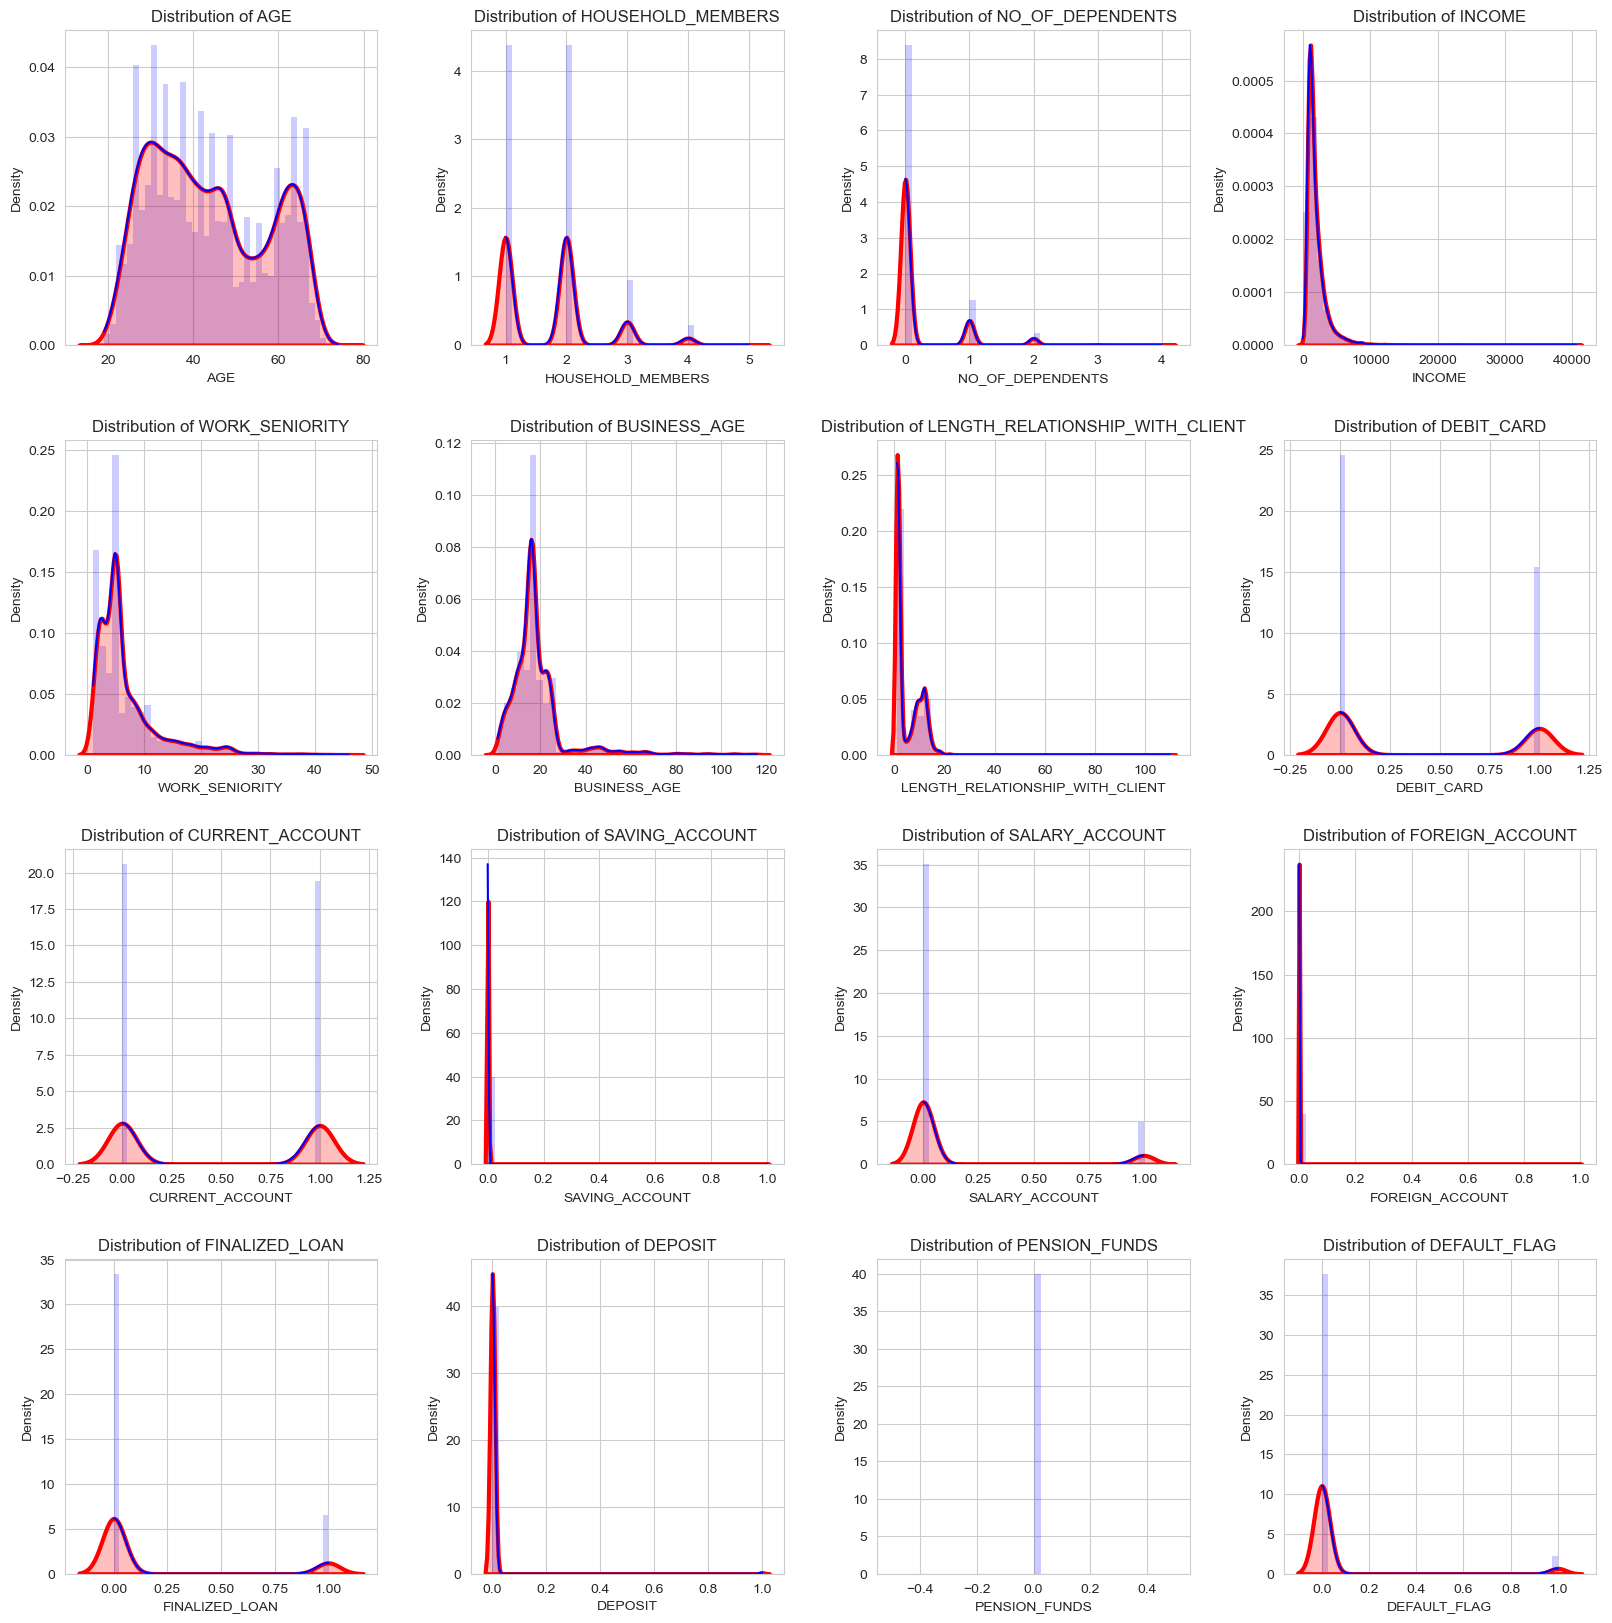

In [174]:
import math

NUMERICAL = list(df.select_dtypes(include="number").columns)
COLS = 4
ROWS = math.ceil(len(NUMERICAL) / COLS)

fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 4, COLS * 4))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, col_name in enumerate(NUMERICAL):
    sns.histplot(df[col_name], kde=True, color='blue', stat='density', ax=axes[i], bins=40, alpha=0.2, linewidth=0)
    sns.kdeplot(df[col_name], color='red', linewidth=3, fill=True, ax=axes[i])
    
    axes[i].set_title(f"Distribution of {col_name}")
    
plt.show()

Pension funds is useless we can drop it

In [175]:
print(np.unique(df["PENSION_FUNDS"]))
df.drop(["PENSION_FUNDS"], axis=1, inplace=True)
NUMERICAL.remove("PENSION_FUNDS")

[0]


Based on above plots and variables names we can assume that below variables are in fact boolean not numeric

In [176]:
BOOLEAN = [
    "DEBIT_CARD", "CURRENT_ACCOUNT", "SAVING_ACCOUNT", "SALARY_ACCOUNT", "FOREIGN_ACCOUNT", "FINALIZED_LOAN", "DEPOSIT", "DEFAULT_FLAG"
]

print_categorical_distribution(BOOLEAN)

COLUMN NAME         CAT NUM   CATEGORIES
DEBIT_CARD          2         0(9298), 1(5799)
CURRENT_ACCOUNT     2         0(7768), 1(7329)
SAVING_ACCOUNT      2         0(15091), 1(6)
SALARY_ACCOUNT      2         0(13237), 1(1860)
FOREIGN_ACCOUNT     2         0(15095), 1(2)
FINALIZED_LOAN      2         0(12618), 1(2479)
DEPOSIT             2         0(15041), 1(56)
DEFAULT_FLAG        2         0(14233), 1(864)


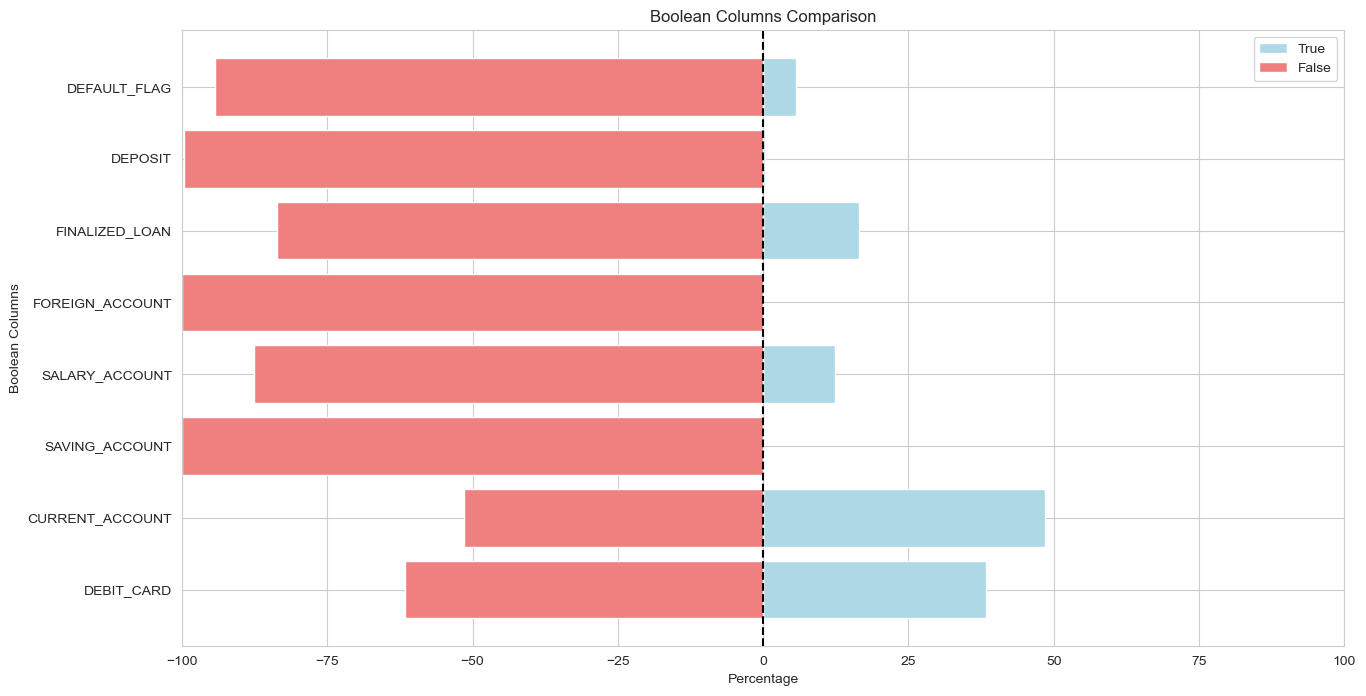

In [177]:

bool_percentages = df.apply(lambda x: x.value_counts(normalize=True) * 100).T

plt.figure(figsize=(15, 8))
legend_added = False  
for col in BOOLEAN:
    plt.barh(col, bool_percentages.loc[col, True], color='lightblue',  label='True' if not legend_added else '' )
    plt.barh(col, -bool_percentages.loc[col, False], color='lightcoral', label='False' if not legend_added else '')
    if not legend_added:
        legend_added = True
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Percentage')
plt.ylabel('Boolean Columns')
plt.title('Boolean Columns Comparison')
plt.xlim(-100, 100)
plt.legend(loc='upper right')
plt.show()

Some of above are almost always 0 so we'll drop them to decrease the number of columns

In [178]:
TO_DROP = ["SAVING_ACCOUNT", "FOREIGN_ACCOUNT", "DEPOSIT"]
BOOLEAN = [col for col in BOOLEAN if col not in TO_DROP]
NUMERICAL = [col for col in NUMERICAL if col not in TO_DROP]
df.drop(TO_DROP, axis=1, inplace=True)

In [179]:
CATEGORICAL.extend(BOOLEAN)
NUMERICAL = [col for col in NUMERICAL if col not in BOOLEAN]

for col in BOOLEAN:
    df[col] = df[col].astype(bool)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS_AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

Now let's check numerical data distribution once again

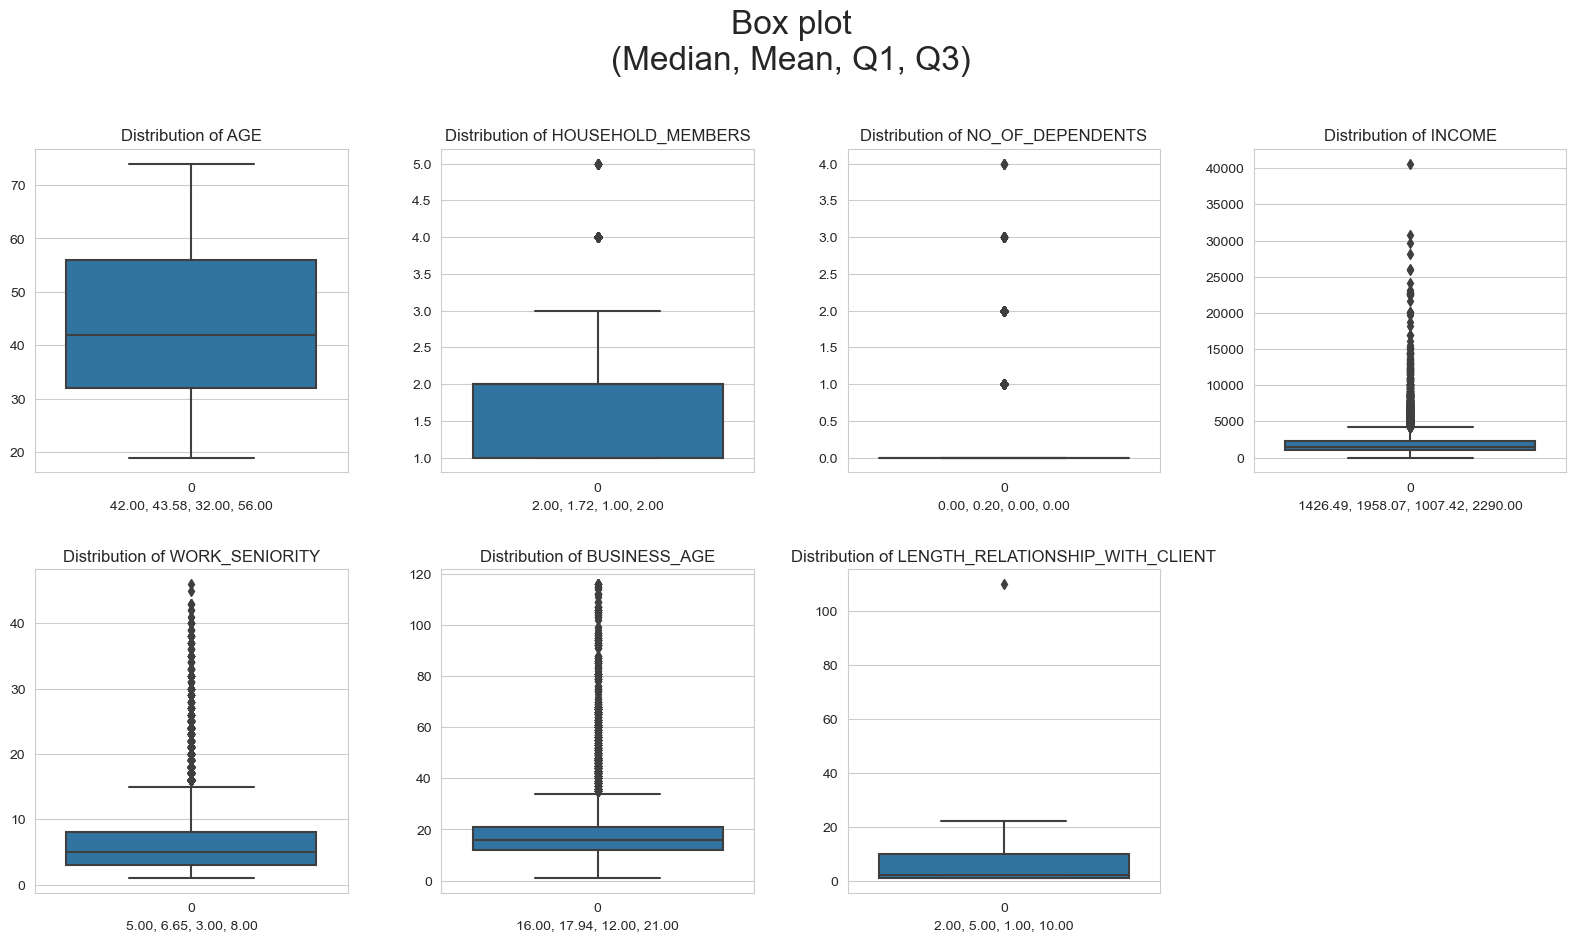

In [181]:
COLS = 4
ROWS = math.ceil(len(NUMERICAL) / COLS)

fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 8, COLS * 2))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Box plot\n(Median, Mean, Q1, Q3)", fontsize=24, y=1.15)

for i, col_name in enumerate(NUMERICAL):
    sns.boxplot(df[col_name], ax=axes[i])
    axes[i].set_title(f"Distribution of {col_name}")
    axes[i].set_xlabel(", ".join([f"{val:.2f}" for val in [np.median(df[col_name]), np.mean(df[col_name]), np.percentile(df[col_name], 25), np.percentile(df[col_name], 75)]]))
    
axes[-1].axis('off')
plt.show()

NO_OF_DEPENDENTS has all no-zero values considered as outliers, we'll convert it to boolean column HAS_DEPENDENTS

In [182]:
df["NO_OF_DEPENDENTS"].value_counts()

NO_OF_DEPENDENTS
0    12671
1     1880
2      510
3       32
4        4
Name: count, dtype: int64

In [183]:
df["HAS_DEPENDENTS"] = df["NO_OF_DEPENDENTS"].apply(lambda x: False if x == 0 else True)
NUMERICAL.remove("NO_OF_DEPENDENTS")
df.drop("NO_OF_DEPENDENTS", axis=1, inplace=True)

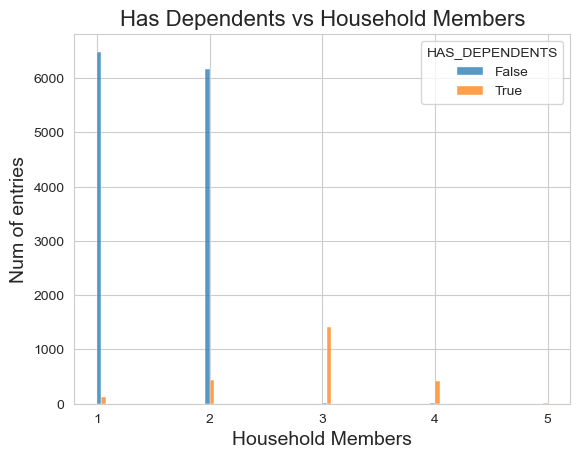

In [184]:
sns.histplot(hue="HAS_DEPENDENTS", x="HOUSEHOLD_MEMBERS", data=df, multiple="dodge")

plt.title('Has Dependents vs Household Members', fontsize=16)
plt.xlabel('Household Members', fontsize=14)
plt.ylabel('Num of entries', fontsize=14)
plt.xticks(range(1, 6))

plt.show()

Now let's see if there is a pattern between age and marital status

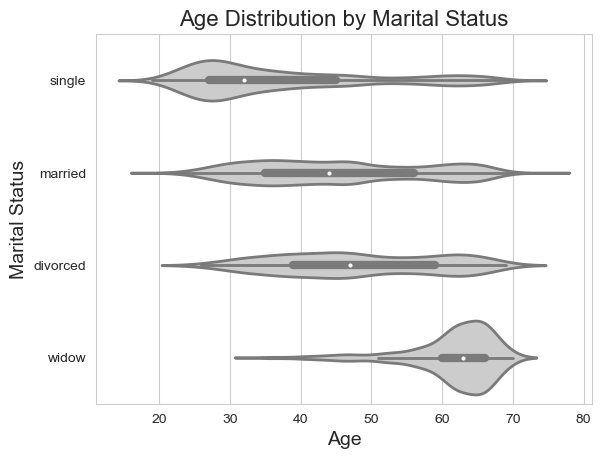

In [185]:
median_order = df.groupby("MARITAL_STATUS")["AGE"].median().sort_values().index
sns.violinplot(x="AGE", y = "MARITAL_STATUS", data=df, order=median_order, linewidth=2, legend=False, palette=sns.color_palette("blend:#CCCC,#CCCC"))

plt.title('Age Distribution by Marital Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)

plt.show()

What about education and income?

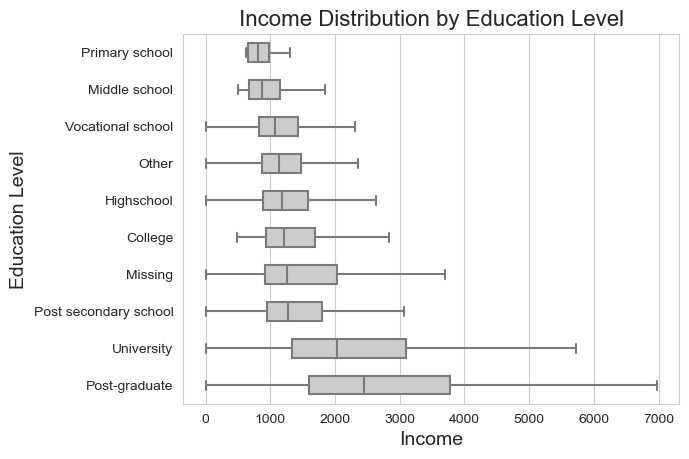

In [186]:
order_by_median = df.groupby("EDUCATION")["INCOME"].median().sort_values().index

sns.boxplot(y="EDUCATION", x="INCOME", data=df, width=0.5, showfliers=False, order=order_by_median, palette=sns.color_palette("blend:#CCCC,#CCCC"))

plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education Level', fontsize=14)

plt.show()

c:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

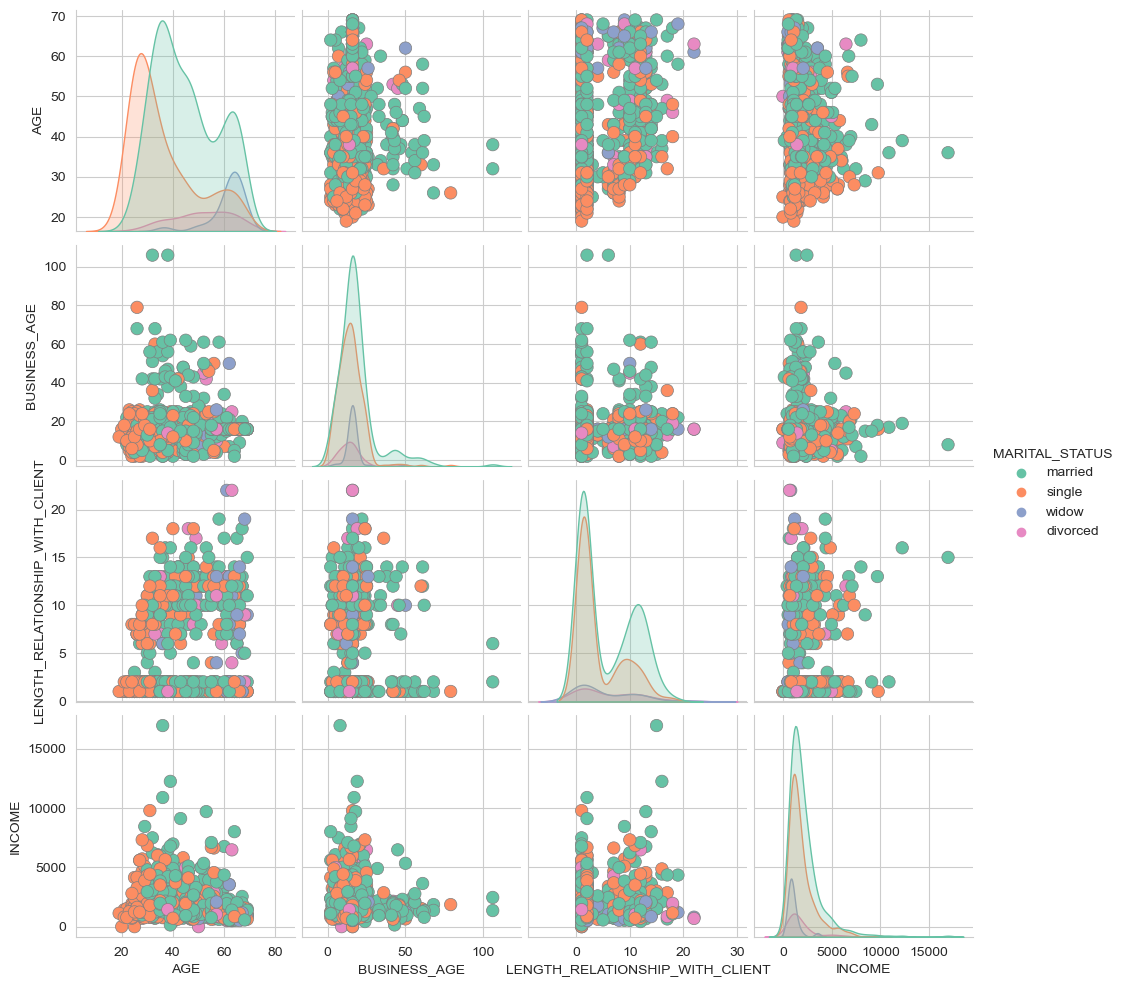

In [187]:
selected_columns = [
    "AGE",
    "MARITAL_STATUS",
    "BUSINESS_AGE",
    "LENGTH_RELATIONSHIP_WITH_CLIENT",
    "INCOME",
]
subset_df = df[selected_columns].sample(frac=0.05, random_state=42)


plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(
    subset_df,
    kind="scatter",
    hue="MARITAL_STATUS",
    plot_kws=dict(s=80, edgecolor="gray", linewidth=0.5),
    palette="Set2",
)
plt.show()

# Handling Missing Values, Encoding categorical variables, Handling outliers

In [206]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


# well keep relation between each education levels
class EducationEncoder(BaseEstimator, TransformerMixin):
    education_map = [
        "Primary school",
        "Middle school",
        "Highschool",
        "Other",
        "Post secondary school",
        "Vocational school",
        "College",
        "University",
        "Post-graduate",
    ]

    def fit(self, X, y=None):
        return self

    def set_output(self, *args, **kwargs):
        return self

    def transform(self, X):
        X['EDUCATION'] = X['EDUCATION'].map(lambda x: EducationEncoder.education_map.index(x) / len(EducationEncoder.education_map)).astype(np.float64)
        return X

# using iqr
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1

        self.r = q3 + 1.5 * iqr
        self.l = q1 - 1.5 * iqr
        return self

    def transform(self, X):
        X_ = X.copy()

        for col in self.column_names:
            # Ensure that the column exists before attempting to apply the mask
            if col in X_.columns:
                X_[col] = X_[col].mask(X_[col] > self.r[col], self.r[col])
                X_[col] = X_[col].mask(X_[col] < self.l[col], self.l[col])

        return X_

    def set_output(self, *args, **kwargs):
        return self


# chence here there are many missing values we'll try to predict
# them based on all numerical data we'll have so far
class EconomicSectorEncoderImputer(BaseEstimator, TransformerMixin):
    estimator = RandomForestClassifier(
        max_depth=5, random_state=42, n_jobs=-1, min_samples_split=10, n_estimators=300
    )
    encoder = make_pipeline(OneHotEncoder(sparse_output=False)).set_output(
        transform="pandas"
    )

    def fit(self, X, y=None):
        train_idx = np.where(X["ECONOMIC_SECTOR"] != "Missing")[0]
        X_train = X.select_dtypes(include="number").loc[train_idx, :]
        y_train = X.loc[train_idx, "ECONOMIC_SECTOR"]
        EconomicSectorEncoderImputer.estimator.fit(X_train, y_train)
        EconomicSectorEncoderImputer.encoder.fit(y_train.to_frame())

        return self

    def transform(self, X):
        X = X.copy()

        pred_idx = np.where(X["ECONOMIC_SECTOR"] == "Missing")[0]
        X_pred = X.select_dtypes(include="number").loc[pred_idx, :]
        X.loc[pred_idx, "ECONOMIC_SECTOR"] = (
            EconomicSectorEncoderImputer.estimator.predict(X_pred)
        )

        encoded = EconomicSectorEncoderImputer.encoder.transform(
            X["ECONOMIC_SECTOR"].to_frame()
        )
        X.drop("ECONOMIC_SECTOR", axis=1, inplace=True)

        return pd.concat([X, encoded], axis=1)

    def set_output(self, *args, **kwargs):
        return self


# we'll assume that relation between employee numbers is relevant 
# and map it as half of possible numbers or 2000 ti indicate highest one
class EmployeeNoEncoderImputer(BaseEstimator, TransformerMixin):
    employee_no_map = {
        "> 1.000": 2000,
        "between 0-10": 5,
        "between 101-250": 175,
        "between 11-20": 15,
        "between 21-50": 35,
        "between 251-500": 375,
        "between 501-1.000": 750,
        "between 51-100": 75,
    }

    estimator = RandomForestClassifier(
        max_depth=5, random_state=42, n_jobs=-1, min_samples_split=10, n_estimators=300
    )

    def fit(self, X, y=None):
        train_idx = np.where(X["EMPLOYEE_NO"] != "Missing")[0]
        X_train = X.select_dtypes(include="number").loc[train_idx, :]
        y_train = X.loc[train_idx, "EMPLOYEE_NO"]
        EmployeeNoEncoderImputer.estimator.fit(X_train, y_train)

        return self

    def transform(self, X):
        X = X.copy()

        pred_idx = np.where(X["EMPLOYEE_NO"] == "Missing")[0]
        X_pred = X.select_dtypes(include="number").loc[pred_idx, :]
        X.loc[pred_idx, "EMPLOYEE_NO"] = self.estimator.predict(X_pred)

        X["EMPLOYEE_NO"] = X["EMPLOYEE_NO"].map(
            lambda x: (EmployeeNoEncoderImputer.employee_no_map[x] - 5) / (2000 - 5)
        )

        return X

    def set_output(self, *args, **kwargs):
        return self


# as previously we'll map it to boolean variable
def create_has_dependents(X):
    return (
        X["NO_OF_DEPENDENTS"]
        .apply(lambda x: False if x == 0 else True)
        .astype(np.float64)
        .to_frame()
    )

class RenameColumn(BaseEstimator, TransformerMixin):
    def __init__(self, old_column_name, new_column_name):
        self.old_column_name = old_column_name
        self.new_column_name = new_column_name

    def transform(self, X):
        X.rename(columns={self.old_column_name: self.new_column_name}, inplace=True)
        return X

    def fit(self, X, y=None):
        return self
    
    def set_output(self, *args, **kwargs):
        return self


In [207]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# EDUCATION has some missing values but not many
# we'll fill them with most frequent one than encode it with our custom encoder
education_pipeline = Pipeline(
    [
        (
            "imputer",
            SimpleImputer(
                strategy="most_frequent",
                missing_values="Missing",
            ),
        ),
        ("encoder", EducationEncoder()),
    ]
)

# ARE has some missing values but not many
# we'll fill them with most frequent one than encode it with OneHotEncoder
area_pipeline = Pipeline(
    [
        (
            "imputer",
            SimpleImputer(
                strategy="most_frequent",
                missing_values="Missing",
            ),
        ),
        ("encoder", OneHotEncoder(sparse_output=False)),
    ]
)

cat_ct = ColumnTransformer(
    [
        # drop unnecessary columns
        (
            "drop",
            "drop",
            ["SAVING_ACCOUNT", "FOREIGN_ACCOUNT", "DEPOSIT", "PENSION_FUNDS"],
        ),
        
        ("education", education_pipeline, ["EDUCATION"]),
        ("area", area_pipeline, ["AREA"]),
        
        # convert NO_OF_DEPENDENTS to HAS_DEPENDENTS categorical boolean variable
        (
            "create_has_dependents",
            FunctionTransformer(create_has_dependents),
            ["NO_OF_DEPENDENTS"],
        ),
        
        # encode with OneHotEncoder
        (
            "one_hot",
            OneHotEncoder(sparse_output=False),
            [
                "PRODUCT",
                "RESIDENTIAL_PLACE",
                "MARITAL_STATUS",
            ],
        ),
    ],
    remainder="passthrough",
).set_output(transform="pandas")


num_ct = ColumnTransformer(
    [   
        # rename the column with wrong format
        (
            "rename_column",
            RenameColumn("BUSINESS AGE","BUSINESS_AGE"),
            ["BUSINESS AGE"]
        ),

        # remove outliers using iqr method
        (
            "outliers",
            RemoveOutliers(column_names=["BUSINESS AGE", "BUSINESS_AGE"]),
            [
                "AGE",
                "HOUSEHOLD_MEMBERS",
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
            ],
        )
    ],
    remainder="passthrough",
).set_output(transform="pandas")

# we apply it only to left-sqewed numerical columns
log_scaler = ColumnTransformer(
    [
        (
            "log_scaler",
            FunctionTransformer(np.log1p),
            [
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
            ],
        ),
    ],
    remainder="passthrough",
).set_output(transform="pandas")

# scale numerical columns
numeric_scaler = ColumnTransformer(
    [
        (
            "numeric_scaler",
            StandardScaler(),
            [
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
                "AGE",
            ],
        )
    ],
    remainder="passthrough",
).set_output(transform="pandas")

employee_pipeline = make_pipeline(EmployeeNoEncoderImputer()).set_output(
    transform="pandas"
)
economic_pipeline = make_pipeline(EconomicSectorEncoderImputer()).set_output(
    transform="pandas"
)


# utility function to keep all column names proper and easily process all data
class MyTransformer(BaseEstimator, TransformerMixin):
    transformers = (
        num_ct,
        cat_ct,
        log_scaler,
        numeric_scaler,
        employee_pipeline,
        economic_pipeline,
    )

    def fit(self, X, y=None):
        for transformer in MyTransformer.transformers:
            X = transformer.fit_transform(X)
            MyTransformer.reset_columns(X)
        return self

    def transform(self, X):
        for transformer in MyTransformer.transformers:
            X = transformer.transform(X)
            MyTransformer.reset_columns(X)
        return X

    @staticmethod
    def reset_columns(X):
        X.columns = [col.split("__")[-1] for col in X.columns]

c:\Users\micha\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [208]:
df = pd.read_csv("../data/orig_train.csv")

processing_pipeline = MyTransformer()
df = processing_pipeline.fit_transform(df)

ValueError: A given column is not a column of the dataframe

In [191]:
df.head(8).T

,0,1,2,3,4,5,6,7
INCOME,-0.284264,-0.129914,-0.428236,0.209025,-0.353263,-1.064038,-0.597856,-1.305153
WORK_SENIORITY,-0.032406,-0.032406,-1.280907,0.887697,-0.032406,0.485769,0.485769,-0.360804
BUSINESS_AGE,0.084231,0.084231,-1.510975,-0.264826,0.084231,-0.869740,-0.398058,0.284194
LENGTH_RELATIONSHIP_WITH_CLIENT,-0.961118,0.916494,-0.961118,-0.454956,-0.961118,-0.961118,1.375542,-0.454956
AGE,1.590982,1.516691,-1.009215,-0.340593,-0.414884,-0.266301,0.105155,-1.232089
EDUCATION,0.777778,0.777778,0.777778,0.888889,0.222222,0.777778,0.777778,0.444444
AREA_County capital,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
AREA_Rural area,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
AREA_Urban area,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NO_OF_DEPENDENTS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


# Learning data correlation and column engineering

In [192]:
def plot_corr(corr, threshold_up=0.8, threshold_down=0.01, hue=None):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    heatmap = sns.heatmap(corr, mask=mask, linewidths=1, cmap="bwr")
    
    for i in range(len(corr)):
        for j in range(len(corr)):
            if i > j:
                corr_val = corr.iloc[i, j]
                if abs(corr_val) >= threshold_up:
                    heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='green'))
                    plt.text(j + 0.5, i + 0.6, f"{corr_val:1.2f}", ha='center', va='center', fontsize=7, color='white')
                if abs(corr_val) <= threshold_down:
                    heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='gray', alpha=0.7))
                    plt.text(j + 0.5, i + 0.6, f"{corr_val:1.2f}", ha='center', va='center', fontsize=7, color='white')
                if hue is not None and corr.columns[i] == hue or corr.columns[j] == hue:
                    heatmap.add_patch(plt.Rectangle((j, i), 1, 1, edgecolor='black', fill=False, linewidth=2.5))

    return heatmap

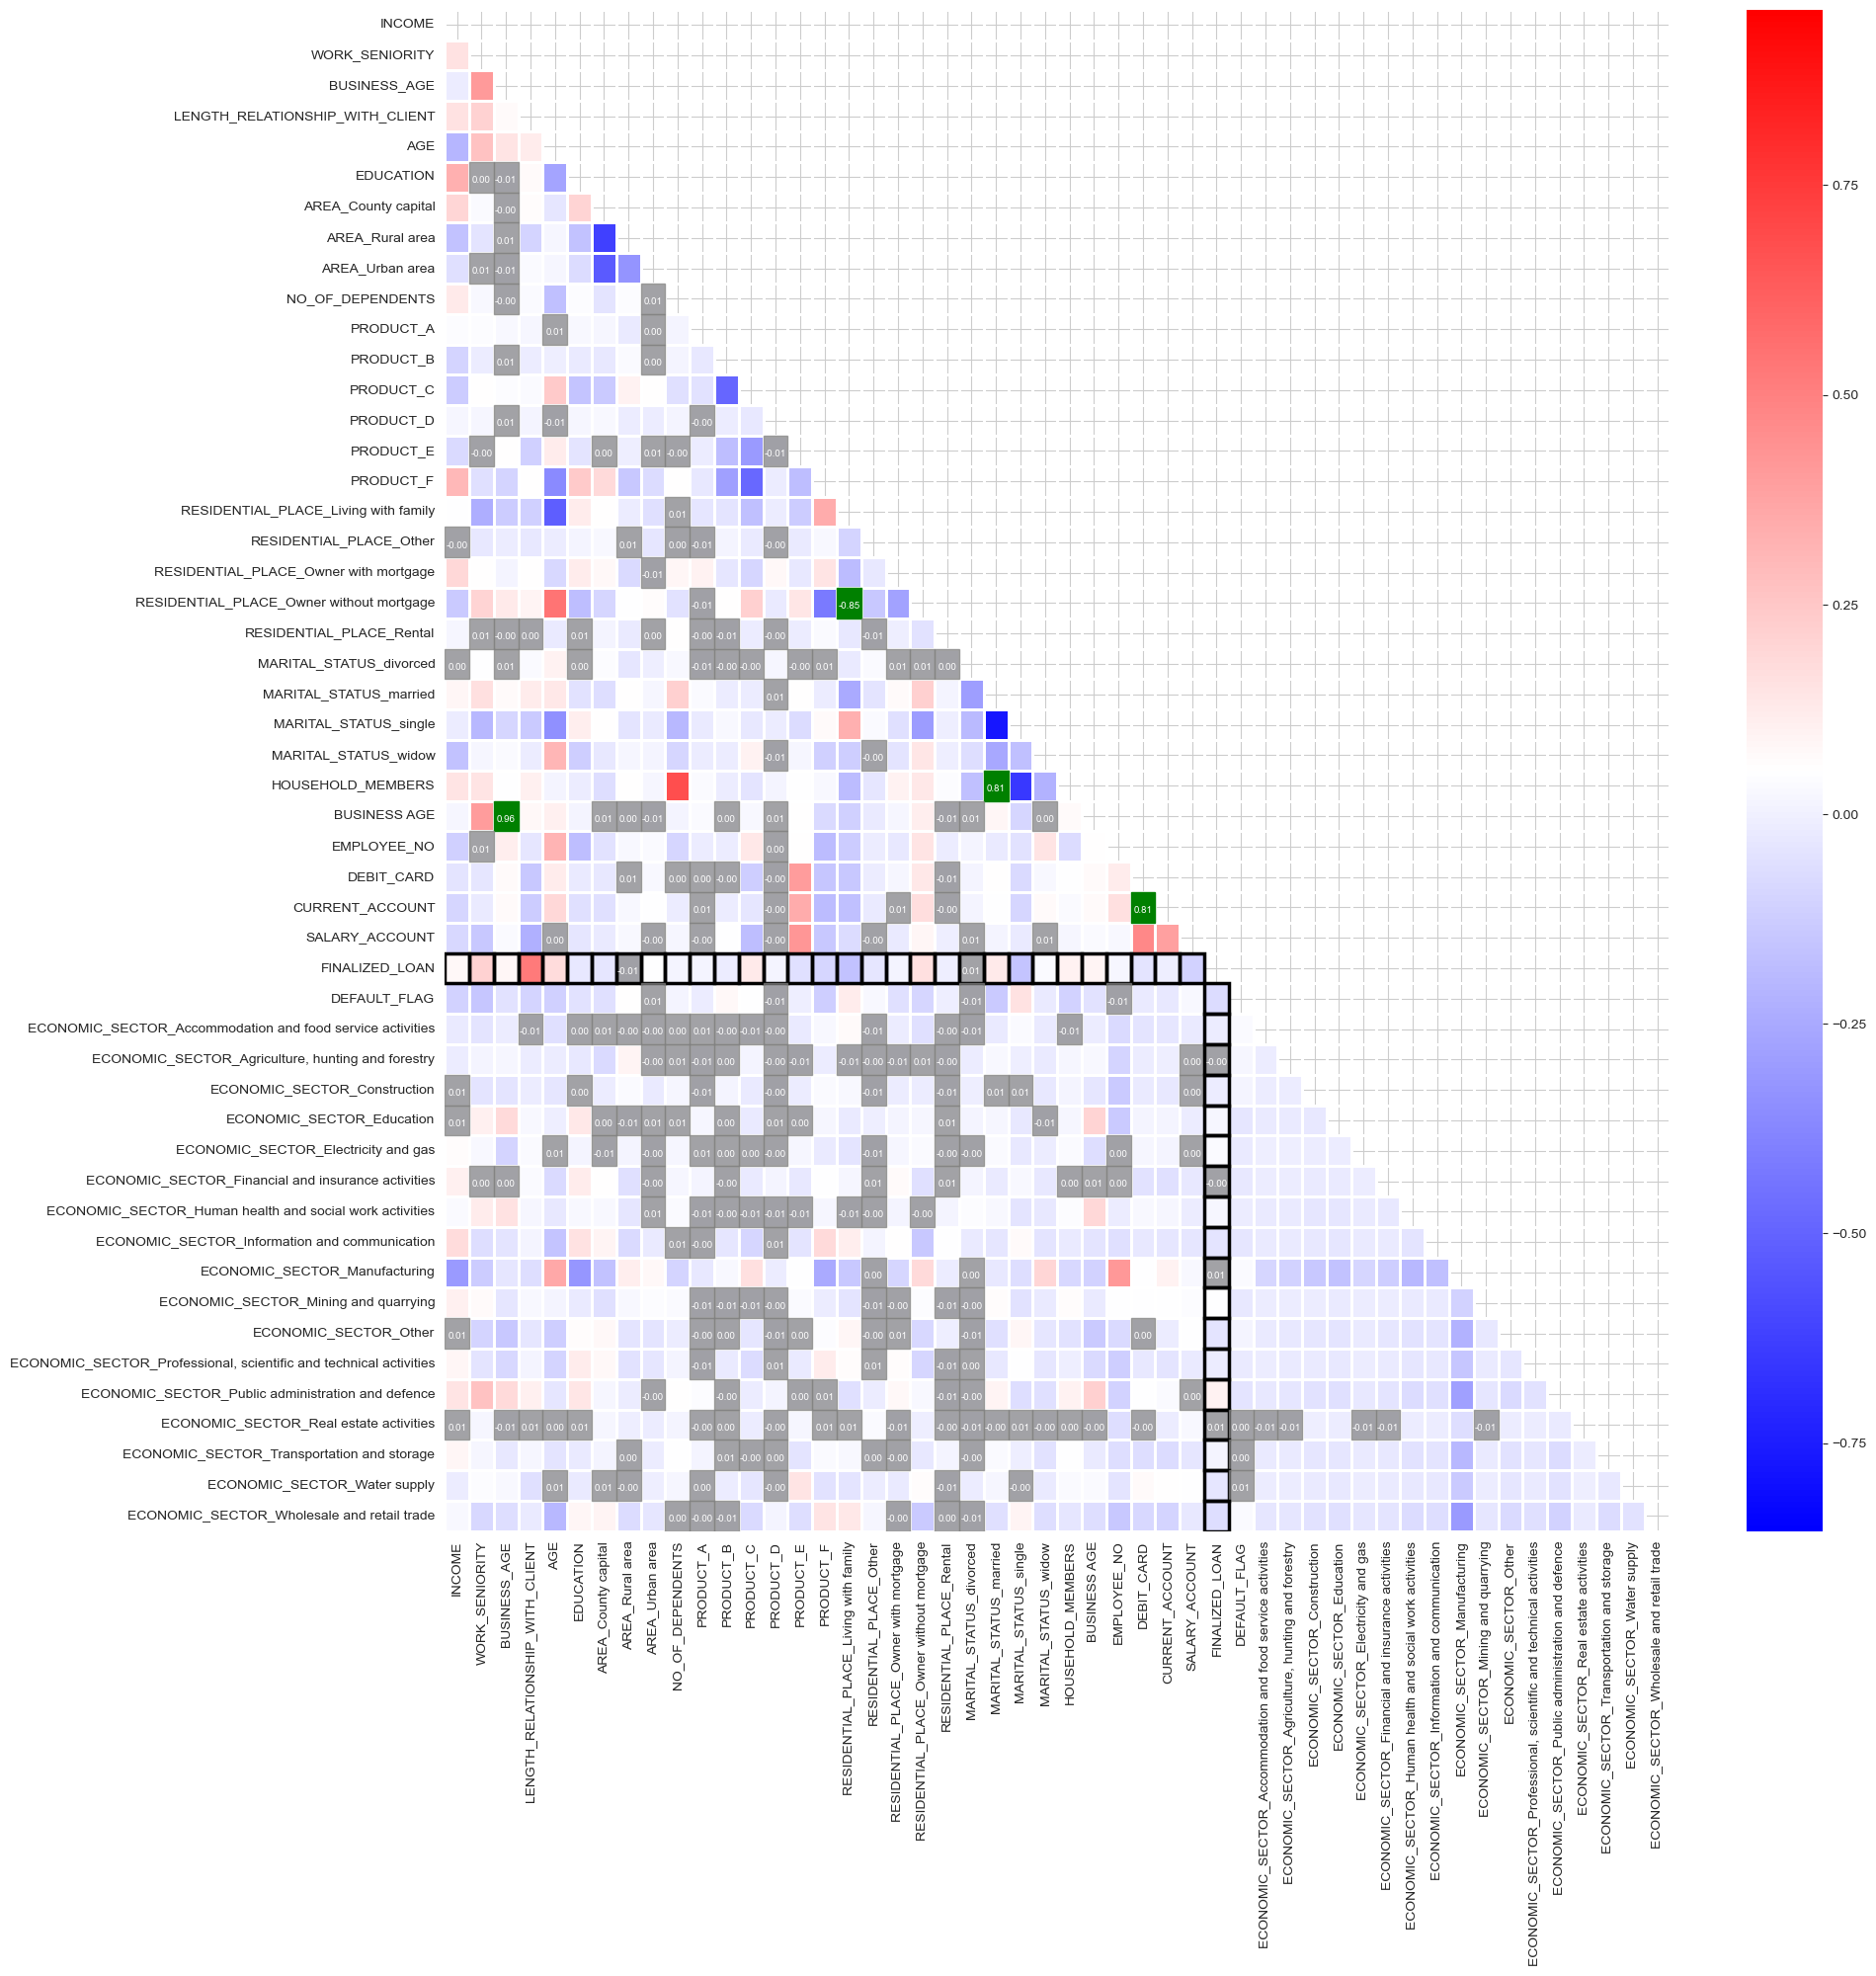

In [193]:
plt.figure(figsize=(20, 20))
corr = df.corr()
plot_corr(corr, hue="FINALIZED_LOAN")
plt.show()

In [194]:
import joblib

joblib.dump(processing_pipeline, 'processing_pipeline.joblib')

['processing_pipeline.joblib']